In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Data_Train.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Exploratory Data Analysis

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


#### Lets check the null values without using visualization

In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

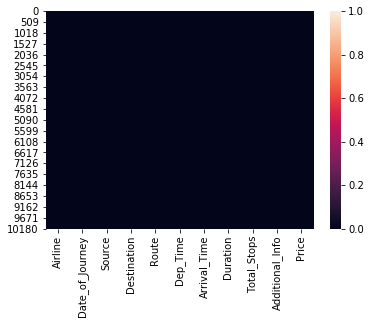

In [6]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [7]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### Checking Unique Value of All Columns and taking Appropriate Action

In [8]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [9]:
data['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

#### Here date cannot be a useful information to predict the output(price),So we are deleting this column

In [10]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [12]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [13]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [14]:
data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [15]:
data['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [16]:
data['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [17]:
data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

#### Here Deapreture time and Arrival Time are replaced by Duration so I am deleting Depareture Timing and Arrival Timing

In [18]:
data.drop('Dep_Time',axis=1,inplace=True)

In [19]:
data.drop('Arrival_Time',axis=1,inplace=True)

In [20]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648


In [21]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [22]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [23]:
data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

#### Here in Additional info Maximum values has no information so it would not be useful and hence I am deleting this column

In [24]:
data.drop('Additional_Info',axis=1,inplace=True)

In [25]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,4107
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,4145
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,7229
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,12648


#### Lets again check the null values

In [26]:
data.isnull().sum()

Airline        0
Source         0
Destination    0
Route          1
Duration       0
Total_Stops    1
Price          0
dtype: int64

#### Filling Null Values with Mode

In [27]:
for column in ['Route', 'Total_Stops']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [28]:
data.isnull().sum()

Airline        0
Source         0
Destination    0
Route          0
Duration       0
Total_Stops    0
Price          0
dtype: int64

In [29]:
data.dtypes

Airline        object
Source         object
Destination    object
Route          object
Duration       object
Total_Stops    object
Price           int64
dtype: object

#### Converting the columns into Numeric Format

In [30]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [31]:
#For all those columns who has 5 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==5):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [32]:
#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==6):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [33]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,IndiGo,0,5,BLR → DEL,2h 50m,4,3897
1,Air India,3,0,CCU → IXR → BBI → BLR,7h 25m,1,7662
2,Jet Airways,2,1,DEL → LKO → BOM → COK,19h,1,13882
3,IndiGo,3,0,CCU → NAG → BLR,5h 25m,0,6218
4,IndiGo,0,5,BLR → NAG → DEL,4h 45m,0,13302
...,...,...,...,...,...,...,...
10678,Air Asia,3,0,CCU → BLR,2h 30m,4,4107
10679,Air India,3,0,CCU → BLR,2h 35m,4,4145
10680,Jet Airways,0,2,BLR → DEL,3h,4,7229
10681,Vistara,0,5,BLR → DEL,2h 40m,4,12648


In [34]:
#For all those columns who has 12 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==12):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [35]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,3,0,5,BLR → DEL,2h 50m,4,3897
1,1,3,0,CCU → IXR → BBI → BLR,7h 25m,1,7662
2,4,2,1,DEL → LKO → BOM → COK,19h,1,13882
3,3,3,0,CCU → NAG → BLR,5h 25m,0,6218
4,3,0,5,BLR → NAG → DEL,4h 45m,0,13302
...,...,...,...,...,...,...,...
10678,0,3,0,CCU → BLR,2h 30m,4,4107
10679,1,3,0,CCU → BLR,2h 35m,4,4145
10680,4,0,2,BLR → DEL,3h,4,7229
10681,10,0,5,BLR → DEL,2h 40m,4,12648


#### Let's convert the Route column into Numeric

In [36]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [37]:
array = data['Route']

array.shapearray = data['Route']

array.shape

(10683,)

In [38]:
le=LabelEncoder()
data1=le.fit_transform(data['Route'])
data1

array([ 18,  84, 118, ...,  18,  18, 108])

In [39]:
data['Route']=data1

In [40]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,3,0,5,18,2h 50m,4,3897
1,1,3,0,84,7h 25m,1,7662
2,4,2,1,118,19h,1,13882
3,3,3,0,91,5h 25m,0,6218
4,3,0,5,29,4h 45m,0,13302
...,...,...,...,...,...,...,...
10678,0,3,0,64,2h 30m,4,4107
10679,1,3,0,64,2h 35m,4,4145
10680,4,0,2,18,3h,4,7229
10681,10,0,5,18,2h 40m,4,12648


#### Let's convert the Duration column into Numeric

In [41]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [42]:
array = data['Duration']

array.shapearray = data['Duration']

array.shape

(10683,)

In [43]:
le=LabelEncoder()
data1=le.fit_transform(data['Duration'])
data1

array([240, 336, 106, ..., 280, 238, 347])

In [44]:
data['Duration']=data1

In [45]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,3,0,5,18,240,4,3897
1,1,3,0,84,336,1,7662
2,4,2,1,118,106,1,13882
3,3,3,0,91,311,0,6218
4,3,0,5,29,303,0,13302
...,...,...,...,...,...,...,...
10678,0,3,0,64,236,4,4107
10679,1,3,0,64,237,4,4145
10680,4,0,2,18,280,4,7229
10681,10,0,5,18,238,4,12648


In [46]:
data.dtypes

Airline        int32
Source         int32
Destination    int32
Route          int32
Duration       int32
Total_Stops    int32
Price          int64
dtype: object

In [47]:
data = pd.DataFrame(data=data)
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,3,0,5,18,240,4,3897
1,1,3,0,84,336,1,7662
2,4,2,1,118,106,1,13882
3,3,3,0,91,311,0,6218
4,3,0,5,29,303,0,13302
...,...,...,...,...,...,...,...
10678,0,3,0,64,236,4,4107
10679,1,3,0,64,237,4,4145
10680,4,0,2,18,280,4,7229
10681,10,0,5,18,238,4,12648


In [48]:
data.shape

(10683, 7)

In [49]:
data.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.822896,194.069269,1.458111,9087.064121
std,2.352155,1.177221,1.474782,36.728405,108.620556,1.806290,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,48.000000,106.000000,0.000000,5277.000000
50%,4.000000,2.000000,1.000000,73.000000,233.000000,0.000000,8372.000000
75%,4.000000,3.000000,2.000000,104.000000,280.000000,4.000000,12373.000000
max,11.000000,4.000000,5.000000,127.000000,367.000000,4.000000,79512.000000


#### Find Out the Correlation

In [50]:
dfcor = data.corr()
dfcor

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
Airline,1.000000,-0.013401,0.018479,0.025118,0.027917,0.036064,-0.039520
Source,-0.013401,1.000000,-0.592574,0.403403,-0.192009,-0.225601,0.015998
Destination,0.018479,-0.592574,1.000000,-0.461183,0.022037,0.337883,-0.071112
Route,0.025118,0.403403,-0.461183,1.000000,-0.062097,-0.437783,0.164118
Duration,0.027917,-0.192009,0.022037,-0.062097,1.000000,0.175207,-0.144270
Total_Stops,0.036064,-0.225601,0.337883,-0.437783,0.175207,1.000000,-0.571174
Price,-0.039520,0.015998,-0.071112,0.164118,-0.144270,-0.571174,1.000000


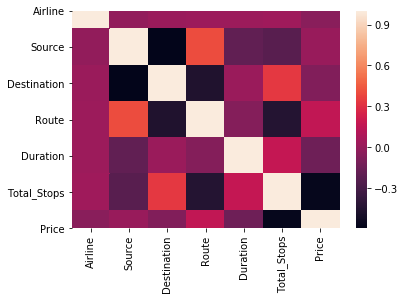

In [51]:
sns.heatmap(dfcor)

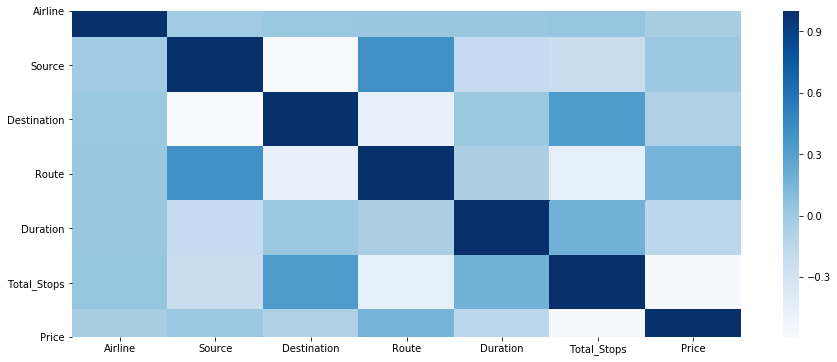

In [52]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

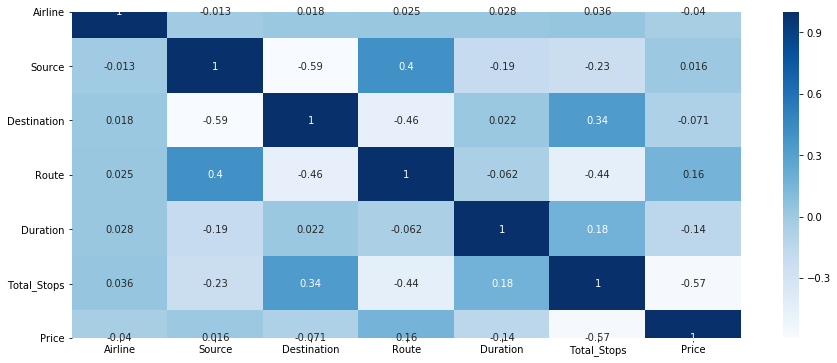

In [53]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

#### Removing the Outliers

In [54]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(10683, 7)
(10587, 7)


#### Checking Skewness and Removing it

In [55]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

Airline        0.731095
Source        -0.424054
Destination    1.244169
Route         -0.502066
Duration      -0.213427
Total_Stops    0.631681
Price          1.812552
dtype: float64

In [56]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [57]:
#Lets Again Check the Skewness
data.skew()

Airline       -0.679875
Source        -0.424054
Destination    0.283084
Route         -0.502066
Duration      -0.213427
Total_Stops    0.466484
Price         -0.254565
dtype: float64

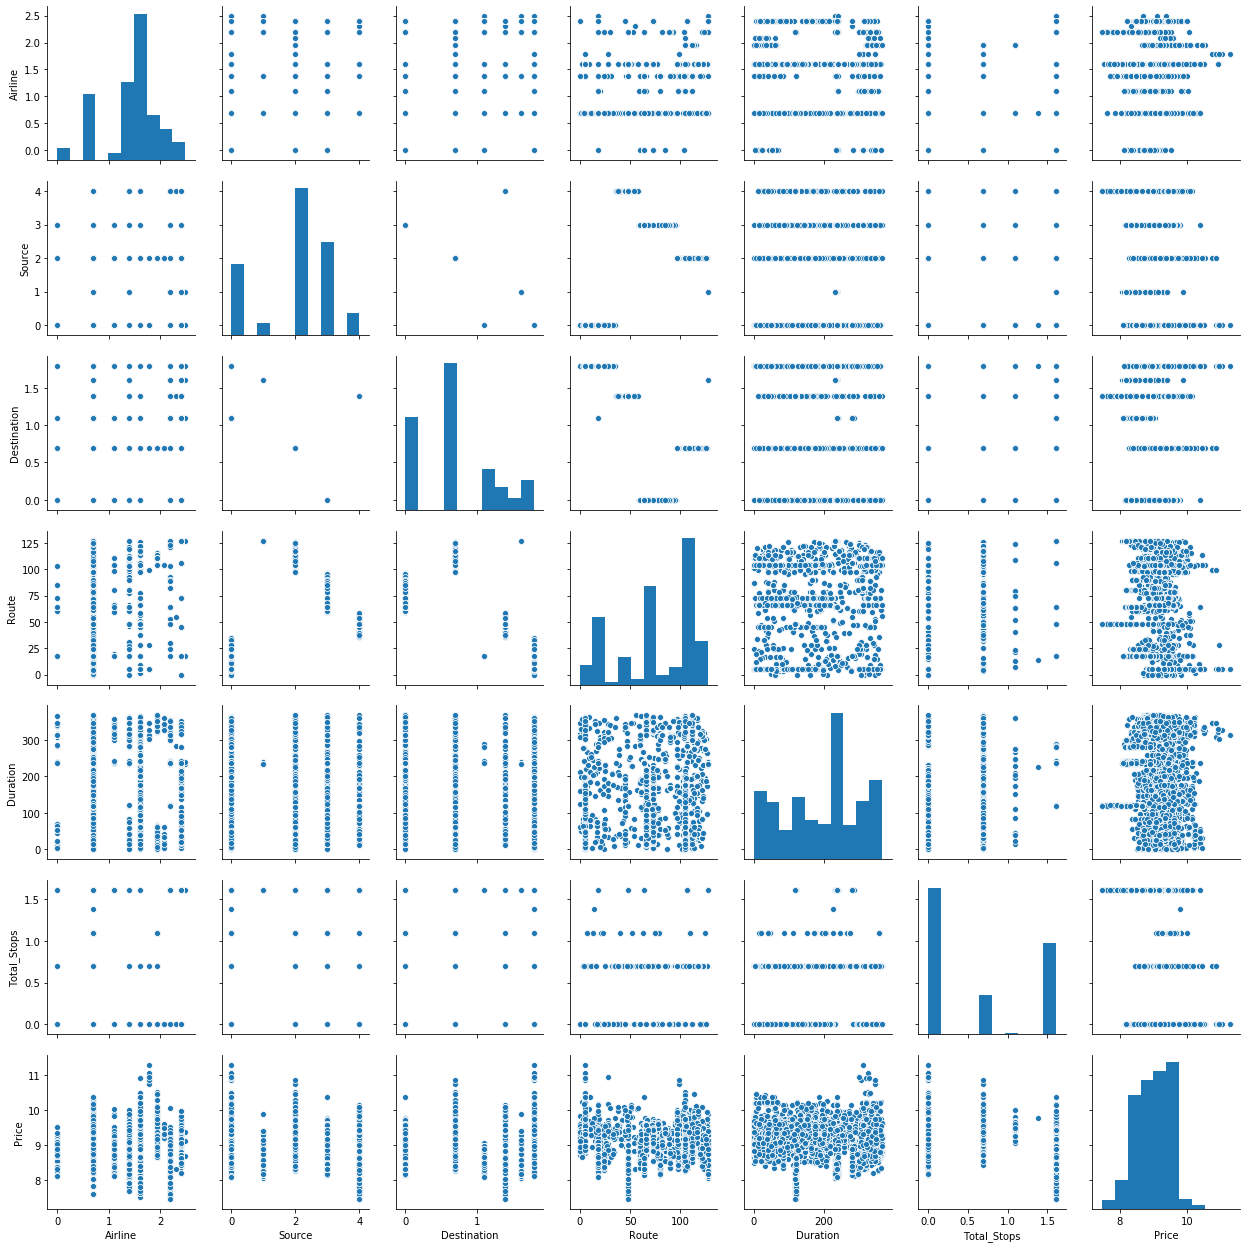

In [58]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### Plotting Boxplot through Iteration

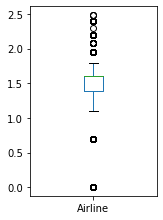

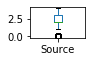

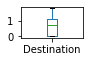

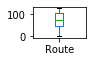

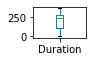

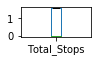

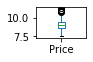

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

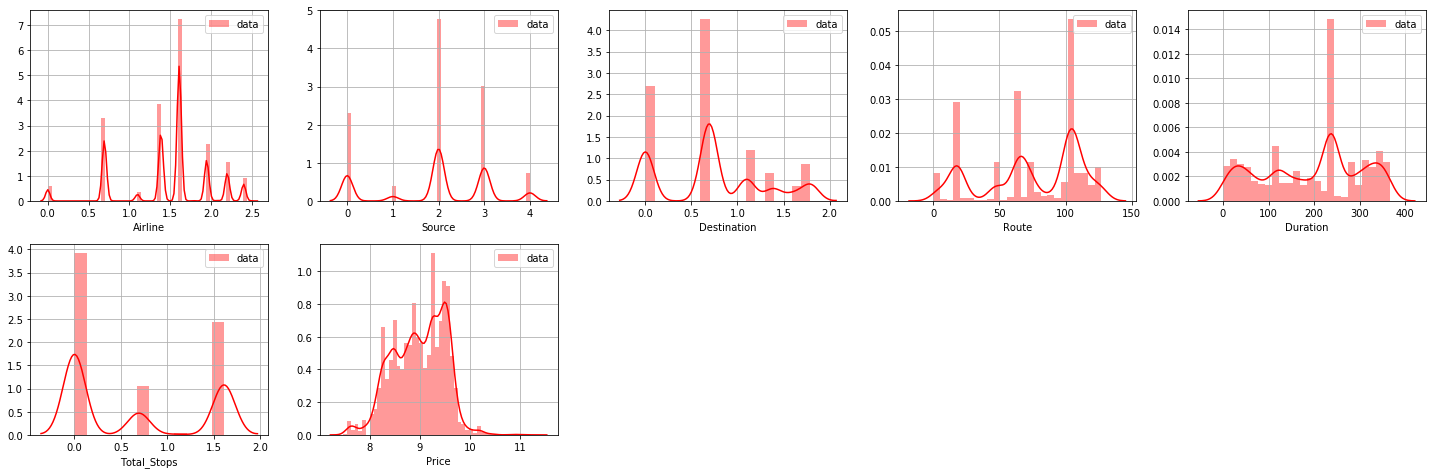

In [60]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [61]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Price'],
      dtype='object')

### Line Plot

In [62]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Price'],
      dtype='object')

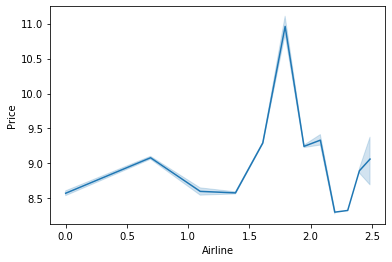

In [63]:
#Lets check the how Airline is changing with respect to Price
sns.lineplot(data["Airline"],data["Price"])
plt.show()

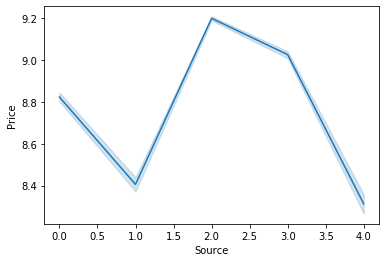

In [64]:
#Lets check the how Source is changing with respect to Price
sns.lineplot(data["Source"],data["Price"])
plt.show()

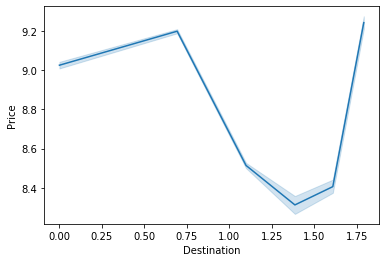

In [65]:
#Lets check the how Destination is changing with respect to Price
sns.lineplot(data["Destination"],data["Price"])
plt.show()

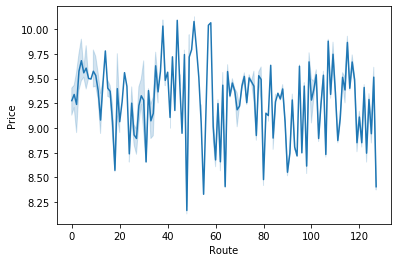

In [66]:
#Lets check the how Route is changing with respect to Price
sns.lineplot(data["Route"],data["Price"])
plt.show()

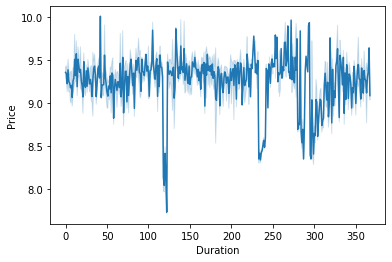

In [67]:
#Lets check the how Duration is changing with respect to Price
sns.lineplot(data["Duration"],data["Price"])
plt.show()

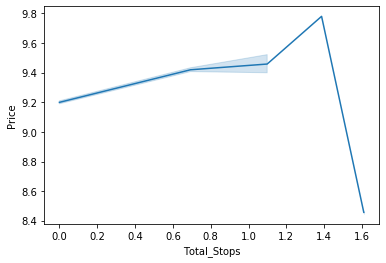

In [68]:
#Lets check the how Total_Stops is changing with respect to Price
sns.lineplot(data["Total_Stops"],data["Price"])
plt.show()

### Plotting Data using Scatter Plot

In [69]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Price'],
      dtype='object')

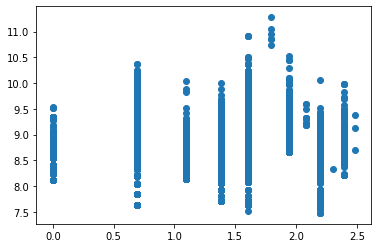

In [70]:
plt.scatter(data['Airline'],data['Price'])

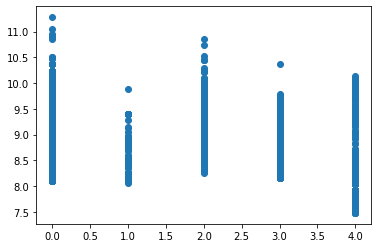

In [71]:
plt.scatter(data['Source'],data['Price'])

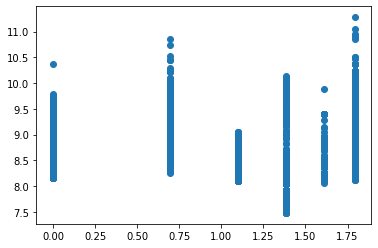

In [72]:
plt.scatter(data['Destination'],data['Price'])

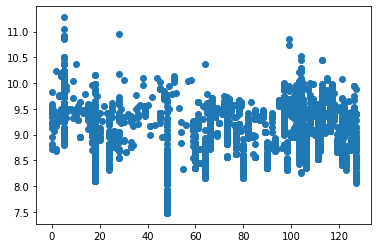

In [73]:
plt.scatter(data['Route'],data['Price'])

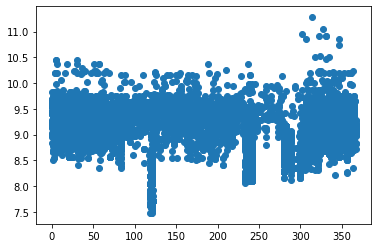

In [74]:
plt.scatter(data['Duration'],data['Price'])

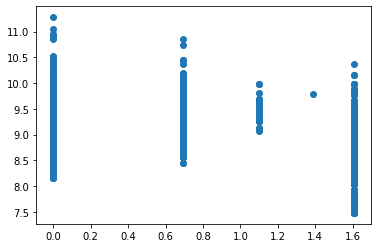

In [75]:
plt.scatter(data['Total_Stops'],data['Price'])

### Column Plot

In [76]:
collist = data.columns.values
ncols=12
nrows=10

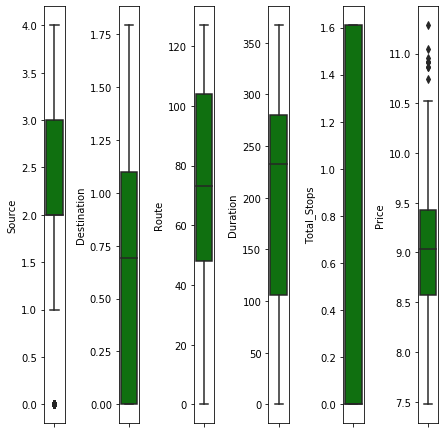

In [77]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Separating X and Y Variable

In [78]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,1.386294,0,1.791759,18,240,1.609438,8.268219
1,0.693147,3,0.000000,84,336,0.693147,8.944159
2,1.609438,2,0.693147,118,106,0.693147,9.538420
3,1.386294,3,0.000000,91,311,0.000000,8.735364
4,1.386294,0,1.791759,29,303,0.000000,9.495745
...,...,...,...,...,...,...,...
10678,0.000000,3,0.000000,64,236,1.609438,8.320692
10679,0.693147,3,0.000000,64,237,1.609438,8.329899
10680,1.609438,0,1.098612,18,280,1.609438,8.885994
10681,2.397895,0,1.791759,18,238,1.609438,9.445333


In [79]:
X = data.drop("Price", axis=1)

In [80]:
X

,Airline,Source,Destination,Route,Duration,Total_Stops
0,1.386294,0,1.791759,18,240,1.609438
1,0.693147,3,0.000000,84,336,0.693147
2,1.609438,2,0.693147,118,106,0.693147
3,1.386294,3,0.000000,91,311,0.000000
4,1.386294,0,1.791759,29,303,0.000000
...,...,...,...,...,...,...
10678,0.000000,3,0.000000,64,236,1.609438
10679,0.693147,3,0.000000,64,237,1.609438
10680,1.609438,0,1.098612,18,280,1.609438
10681,2.397895,0,1.791759,18,238,1.609438


In [81]:
Y = data["Price"]
Y

0        8.268219
1        8.944159
2        9.538420
3        8.735364
4        9.495745
           ...   
10678    8.320692
10679    8.329899
10680    8.885994
10681    9.445333
10682    9.371949
Name: Price, Length: 10683, dtype: float64

In [82]:
X.shape

(10683, 6)

In [83]:
Y.shape

(10683,)

In [84]:
Y = Y.values.reshape(-1,1)

In [85]:
Y

array([[8.26821888],
       [8.94415883],
       [9.53842035],
       ...,
       [8.88599432],
       [9.44533344],
       [9.37194889]])

In [86]:
Y.shape

(10683, 1)

#### Applying Linear Regression

In [87]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [88]:
train_X.shape

(7157, 6)

In [89]:
train_Y.shape

(7157, 1)

In [90]:
test_X.shape

(3526, 6)

In [91]:
test_Y.shape

(3526, 1)

In [92]:
lg = LinearRegression()

In [93]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
lg.coef_

array([[-0.03769724, -0.09092235, -0.08590125,  0.00063941, -0.00045066,
        -0.43376529]])

In [95]:
lg.intercept_

array([9.59718553])

In [96]:
lg.score(train_X,train_Y)

0.4284471690661095

In [97]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[9.1477658 ]
 [8.94590946]
 [8.61765141]
 ...
 [9.26067782]
 [8.68236638]
 [9.34894219]]
actual price [[9.55951728]
 [8.99949588]
 [8.44870019]
 ...
 [9.37999875]
 [8.84822207]
 [8.99961934]]


In [98]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.3205359431927612
Mean sqaured error: 0.15215965466091827
Root mean squared error: 0.3900764728369532


#### Boost through GradientBoostRegressor By using Parameters

In [99]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.7548013158701338
Mean squared error: 0.06
R2 Score: 0.78


#### Lets Visualize the Goodness of the Prediction

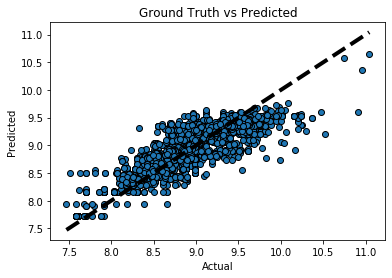

In [101]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Linear Regression using Recursion

In [102]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [103]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [104]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.411382090939829
r2 score corresponding to  43 is 0.41785728657841636
r2 score corresponding to  44 is 0.4040347260261632
r2 score corresponding to  45 is 0.4068303415536676
r2 score corresponding to  46 is 0.4547203569677787
r2 score corresponding to  47 is 0.453015999734946
r2 score corresponding to  48 is 0.43496335418840815
r2 score corresponding to  49 is 0.40761938639715245
r2 score corresponding to  50 is 0.4371847455008522
r2 score corresponding to  51 is 0.43413399431382327
r2 score corresponding to  52 is 0.40946873589375676
r2 score corresponding to  53 is 0.41696748490083946
r2 score corresponding to  54 is 0.43870703711642245
r2 score corresponding to  55 is 0.427980226759187
r2 score corresponding to  56 is 0.42232172977693194
r2 score corresponding to  57 is 0.43788517278263905
r2 score corresponding to  58 is 0.43186499638390585
r2 score corresponding to  59 is 0.4133149586682118
r2 score corresponding to  60 is 0.4275126808331384
r2 sc

### KNN Model

In [105]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 0.07
R2 Score of linear svc: 0.74


### Lets use grid_search to find optimal value of n_neighbors for KNN Model

In [106]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 8}

In [107]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=8)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.6944809321651204
r2 score corresponding to  43 is 0.7440792239879385
r2 score corresponding to  44 is 0.7088263531947299
r2 score corresponding to  45 is 0.7283199226180632
r2 score corresponding to  46 is 0.7351199662113876
r2 score corresponding to  47 is 0.7360592605641049
r2 score corresponding to  48 is 0.7315327969169404
r2 score corresponding to  49 is 0.7455404673655261
r2 score corresponding to  50 is 0.7496184196061593
r2 score corresponding to  51 is 0.7261610420221574
r2 score corresponding to  52 is 0.747831615364662
r2 score corresponding to  53 is 0.7184706963627097
r2 score corresponding to  54 is 0.7378384291316437
r2 score corresponding to  55 is 0.7476802997528882
r2 score corresponding to  56 is 0.7298390731606075
r2 score corresponding to  57 is 0.7364135412044331
r2 score corresponding to  58 is 0.7280300299901887
r2 score corresponding to  59 is 0.7126282110222353
r2 score corresponding to  60 is 0.7247254109289052
r2 score corr

In [108]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.4272980100912207
Standard deviation in r2 scorefor Linear Regression: 0.017710907064599123

Mean r2 score for KNN Regression:  0.7352468447246892
Stadard deviation in r2 score for KNN Regression: 0.01404811017426926


### Boosting Linear Regression

In [109]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6210945423885599
Standard deviation in r2 score for ada boosting Regression:  0.020219487378223416


### Boosting KNN model

In [110]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6203785128210944
Standard deviation in r2 score for ada boosting Regression:  0.014016488357519678


#### Lets check lasso regression and best value of alpha

In [111]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [112]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.4272536851581698
Standard deviation in r2 score for Lasso Regression:  0.017453521782379577


### Boosting Lasso Regressor

In [113]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6274585242329971
Standard deviation in r2 score for ada boosting Regression:  0.027130878197638153


### Support Vector Regression

In [114]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "rbf")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.07
R2 Score of linear svc: 0.73


### Boosting Support Vector Machine

In [115]:
from sklearn.ensemble import AdaBoostRegressor

In [116]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6271081306778651
Standard deviation in r2 score for ada boosting Regression:  0.02139282178917789


### Decision Tree Regressor

In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.05
R2 Score : 0.83


#### Lets Visualize the Goodness of the Prediction

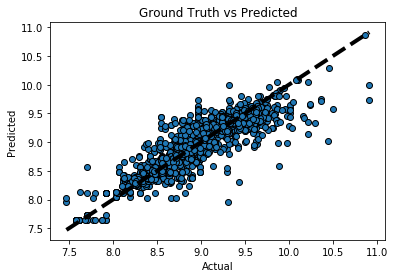

In [118]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_pred4, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [119]:
#predict the value
pred=dtregressor.predict(test_X)
print("Predicted result price:",y_pred4)
print("actual price",test_Y)

Predicted result price: [9.40555707 9.42346372 8.47147004 ... 8.81722697 9.32649165 9.18902215]
actual price [[9.6011655 ]
 [9.59662266]
 [8.47741232]
 ...
 [8.83098151]
 [9.42335278]
 [8.8629083 ]]


### Boosting Decision Tree

In [120]:
from sklearn.ensemble import AdaBoostRegressor

In [121]:
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7519638262985018
Standard deviation in r2 score for ada boosting Regression:  0.008904965907455513


### Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.06
R2 Score : 0.77


#### Random Forest Regressor with GridSearchCV

In [123]:
rf_gs = RandomForestRegressor(n_estimators=100)

In [124]:
n_features = X.shape[1]

In [125]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 5, 'max_depth': 12}


In [126]:
rf_gss = RandomForestRegressor(max_features = 6, max_depth = 11)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7723328865832308
Standard deviation in r2 score for ada boosting Regression:  0.009098992929771012


#### Boosting RandomForestRegressor

In [127]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7631400104408196
Standard deviation in r2 score for ada boosting Regression:  0.009067097182908


#### NOTE::All models,dtregressor gives the Highest r2 score(0.83) and mean squared error is 0.05 so we are going to save this model

In [128]:
import pickle
filename = 'Airline.sav'
pickle.dump(dtregressor, open(filename, 'wb'))

In [129]:
# Load model from disk and use it to make new predictions
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_X, test_Y)
print(result)

0.8274159194637731


### Test Dataset of Airline 

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [131]:
data1 = pd.read_excel('Test_set.xlsx')
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [132]:
data1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [133]:
data1.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


#### Lets check the null values without using visualization

In [134]:
data1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

#### Converting the  Testing Data into the same format like Training Dataset

In [135]:
data1.drop('Date_of_Journey',axis=1,inplace=True)

In [136]:
data1.drop('Dep_Time',axis=1,inplace=True)

In [137]:
data1.drop('Arrival_Time',axis=1,inplace=True)

In [138]:
data1.drop('Additional_Info',axis=1,inplace=True)

In [139]:
data1

,Airline,Source,Destination,Route,Duration,Total_Stops
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop
...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop


In [140]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [141]:
#For all those columns who has 5 attributes
from sklearn import preprocessing
for cols in data1.columns:
    if(len(data1[cols].value_counts()) ==5):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data1[cols] = le_anima.fit_transform(data1[cols])

In [142]:
#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in data1.columns:
    if(len(data1[cols].value_counts()) ==6):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data1[cols] = le_anima.fit_transform(data1[cols])

In [143]:
data1['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [144]:
#For all those columns who has 11 attributes
from sklearn import preprocessing
for cols in data1.columns:
    if(len(data1[cols].value_counts()) ==11):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data1[cols] = le_anima.fit_transform(data1[cols])

In [145]:
data1

,Airline,Source,Destination,Route,Duration,Total_Stops
0,4,2,1,DEL → BOM → COK,10h 55m,0
1,3,3,0,CCU → MAA → BLR,4h,0
2,4,2,1,DEL → BOM → COK,23h 45m,0
3,6,2,1,DEL → BOM → COK,13h,0
4,0,0,2,BLR → DEL,2h 50m,4
...,...,...,...,...,...,...
2666,1,3,0,CCU → DEL → BLR,23h 55m,0
2667,3,3,0,CCU → BLR,2h 35m,4
2668,4,2,1,DEL → BOM → COK,6h 35m,0
2669,1,2,1,DEL → BOM → COK,15h 15m,0


In [146]:
array = data1['Route']

array.shapearray = data1['Route']

array.shape

(2671,)

In [147]:
le=LabelEncoder()
data2=le.fit_transform(data1['Route'])
data2

array([76, 65, 76, ..., 76, 76, 76])

In [148]:
data1['Route']=data2

In [149]:
data1

,Airline,Source,Destination,Route,Duration,Total_Stops
0,4,2,1,76,10h 55m,0
1,3,3,0,65,4h,0
2,4,2,1,76,23h 45m,0
3,6,2,1,76,13h,0
4,0,0,2,16,2h 50m,4
...,...,...,...,...,...,...
2666,1,3,0,51,23h 55m,0
2667,3,3,0,43,2h 35m,4
2668,4,2,1,76,6h 35m,0
2669,1,2,1,76,15h 15m,0


#### Let's convert the Duration column into Numeric

In [150]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [151]:
array = data1['Duration']

array.shapearray = data1['Duration']

array.shape

(2671,)

In [152]:
le=LabelEncoder()
data2=le.fit_transform(data1['Duration'])
data2

array([ 10, 248, 148, ..., 278,  60,  49])

In [153]:
data1['Duration']=data2

In [154]:
data1

,Airline,Source,Destination,Route,Duration,Total_Stops
0,4,2,1,76,10,0
1,3,3,0,65,248,0
2,4,2,1,76,148,0
3,6,2,1,76,36,0
4,0,0,2,16,216,4
...,...,...,...,...,...,...
2666,1,3,0,51,150,0
2667,3,3,0,43,213,4
2668,4,2,1,76,278,0
2669,1,2,1,76,60,0


In [155]:
data1.dtypes

Airline        int32
Source         int32
Destination    int32
Route          int32
Duration       int32
Total_Stops    int32
dtype: object

In [156]:
data1

,Airline,Source,Destination,Route,Duration,Total_Stops
0,4,2,1,76,10,0
1,3,3,0,65,248,0
2,4,2,1,76,148,0
3,6,2,1,76,36,0
4,0,0,2,16,216,4
...,...,...,...,...,...,...
2666,1,3,0,51,150,0
2667,3,3,0,43,213,4
2668,4,2,1,76,278,0
2669,1,2,1,76,60,0


In [157]:
data1.shape

(2671, 6)

In [158]:
data1.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,1.961438,1.432797,54.356421,169.453014,1.422688
std,2.295657,1.184328,1.467971,27.128993,93.907162,1.795728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,33.000000,91.000000,0.000000
50%,4.000000,2.000000,1.000000,51.000000,209.000000,0.000000
75%,6.000000,3.000000,2.000000,76.000000,241.000000,4.000000
max,10.000000,4.000000,5.000000,99.000000,319.000000,4.000000


#### Removing the Outliers

In [159]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data1))
print(data1.shape)
data1_final=data1.loc[(z_score<3).all(axis=1)]
print(data1_final.shape)

(2671, 6)
(2671, 6)


#### Checking Skewness and Removing it

In [160]:
#Check Skewness 
data1.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

Airline        0.483882
Source        -0.424997
Destination    1.263630
Route         -0.281807
Duration      -0.275404
Total_Stops    0.672623
dtype: float64

In [161]:
#Treating the skewness using log
import numpy as np
for col in data1.columns:
#Here complete column name has been passed
    if data1.skew().loc[col]>0.55:
        data1[col]=np.log1p(data1[col])

In [162]:
#Lets Again Check the Skewness
data1.skew()

Airline        0.483882
Source        -0.424997
Destination    0.283171
Route         -0.281807
Duration      -0.275404
Total_Stops    0.504977
dtype: float64

### Load Test Dataset into dtregressor Model 

In [163]:
train_X = data1
pred = dtregressor.predict(train_X)
print(pred)

[9.41841089 9.40120863 9.40120863 ... 9.26681915 9.24851439 9.08930399]


#### Compare the Predicted Result with Actual Price of Testing DataSet Using dtregressor Model 

In [164]:
#predict the value
pred1=dtregressor.predict(test_X)
print("Predicted result price:",pred1)
print("actual price",test_Y)

Predicted result price: [9.40555707 9.42346372 8.47147004 ... 8.81722697 9.32649165 9.18902215]
actual price [[9.6011655 ]
 [9.59662266]
 [8.47741232]
 ...
 [8.83098151]
 [9.42335278]
 [8.8629083 ]]
